<a href="https://colab.research.google.com/github/komorimasashi/jinka-stat-a1/blob/main/R05_Descriptives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **5. 記述統計量**

### **5.1 平均値（mean）と中央値（median）**

平均値は、データセット内の全ての数値の合計を、数値の個数で割ったものです。これはデータセットの中心傾向を示します。

**平均：**$$\bar{x}=\frac{1}{n}\sum_{i=1}^nx_i $$

In [2]:
# データセットの例
data <- c(4, 8, 15, 16, 23, 42)

# 平均値を計算
mean_value <- mean(data)
print(mean_value)

[1] 18


中央値を求める関数は`median()`です。

In [3]:
median_value <- median(data)
print(median_value)

[1] 15.5


四分位数を求める関数`quantile()`で中央値を求めることもできます。

In [7]:
quantile(data)[3]  # [1]: 最小値， [2]: 25パーセンタイル，　[3]: 中央値， [4] 75パーセンタイル， [5]最大値

50% 
15.5

### **5.2 分散 (variance)と標準偏差**

#### **5.2.1 分散**

分散は、各データ点が平均からどれだけ離れているかの平均的な値です。これはデータの散らばり具合を示します。

Rで分散を求める関数である`var()`関数は不偏分散（unbiased variance）という母分散の推定値を計算する関数です。Rに標本分散を計算する組み込み関数はありません。標本分散と不偏分散は次のような関係にありますので標本分散もvar()を使って簡単に求めることができます。

**標本分散：**$$s^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2$$
**不偏分散：**$$u^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$
**標本分散と不偏分散の関係：**$$u^2 = \frac{n}{n-1} s^2$$

In [9]:
# var()を使う場合

# データセット
data <- c(4, 8, 15, 16, 23, 42, 55, 59)

# 不偏分散を計算
unbiased_variance <- var(data)

# 不偏分散の結果を表示
print(unbiased_variance)

# データの個数
n <- length(data)

# 標本分散を計算（不偏分散にn-1を掛けてからnで割る）
sample_variance <- unbiased_variance * (n - 1) / n

# 標本分散の結果を表示
print(sample_variance)

[1] 457.0714
[1] 399.9375


In [ ]:
# もちろん公式通りに求めても良い
# 標本分散を計算
sample_variance <- sum((data - mean(data))^2) / length(data)

# 標本分散の結果を表示
print(sample_variance)

# 不偏分散を計算
unbiased_variance <- sum((data - mean(data))^2) / (length(data)-1)

# 不偏分散の結果を表示
print(unbiased_variance)

[1] 399.9375
[1] 457.0714


#### **5.2.2 標準偏差**

 **標本標準偏差:** $s = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2}$

**不偏標準偏差:** $u = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2}$

分散の平方根である標準偏差でも、標本標準偏差を求める関数はない。

In [10]:
# 標本標準偏差
sqrt(sample_variance)

# 不偏標準偏差
sqrt(unbiased_variance)
sd(data)  # Rのsd()は不偏標準偏差を返す

[1] 19.99844

[1] 21.37923

[1] 21.37923

標準偏差は特定の分布内のデータポイントが平均からどの程度離れているかを示すのに役立ちます。つまり、
標準偏差はある種の「単位」にように扱われます。これによって異なるデータセットや測定値を標準化された形で比較することができます

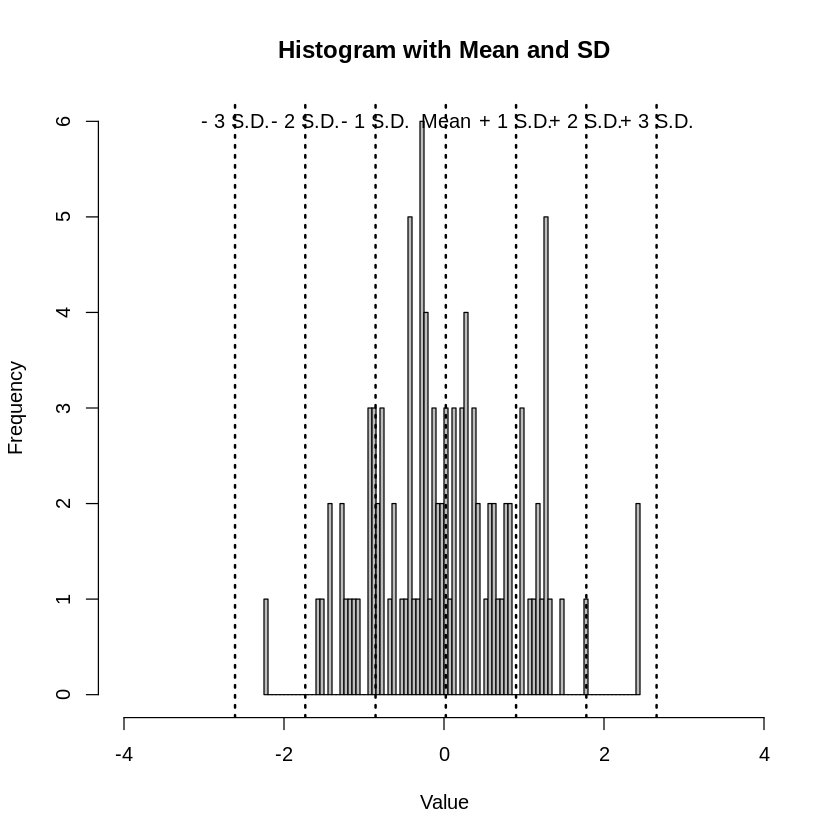

In [11]:
# 乱数のシードを設定
set.seed(0)

# 標準正規分布に従う乱数100個を生成
x <- rnorm(100)

# ヒストグラムの描画設定
hist(x, breaks=100, xlim=c(-4, 4), col="grey", main="Histogram with Mean and SD", xlab="Value", ylab="Frequency")

# 平均値と標準偏差を計算
mean_x <- mean(x)
sd_x <- sqrt(sum((x - mean(x))^2) / length(x))

# 平均値に垂直な黒い点線を追加
abline(v=mean_x, col="black", lty=3, lwd=2)

# 平均値の位置に「Mean」というテキストを追加
text(x=mean_x, y=6, labels="Mean", col="black", cex=1)

# 平均±標準偏差に垂直な黒い点線とテキストを追加
for (i in 1:3) {
  abline(v=mean_x + i*sd_x, col="black", lty=3, lwd=2)
  text(x=mean_x + i*sd_x, y=6, labels=paste("+", i, "S.D."), col="black", cex=1)

  abline(v=mean_x - i*sd_x, col="black", lty=3, lwd=2)
  text(x=mean_x - i*sd_x, y=6, labels=paste("-", i, "S.D."), col="black", cex=1)
}

# 平均から+1標準偏差までの水平線を描く
segments(x0=mean_x, y0=9, x1=mean_x + sd_x, y1=9, col="black", lty=2, lwd=2)

### **5.3 四分位偏差、四分位範囲**

#### **5.3.1 四分位範囲 (Interquartile Range: IQR)**

In [12]:
# データセット
data <- c(4, 8, 15, 16, 23, 42, 55, 59)

# 四分位範囲を計算
iqr_value <- IQR(data)
print(iqr_value)

# quantile()関数を使っても良い
print(quantile(data, 0.75) - quantile(data, 0.25) )

[1] 32
75% 
 32 


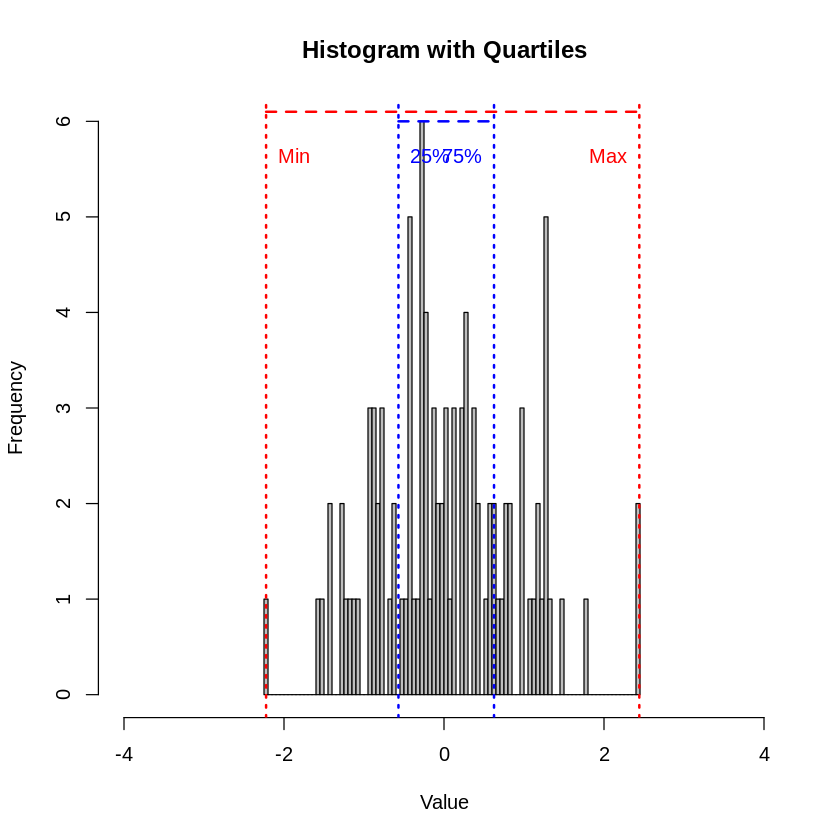

In [ ]:
#四分位範囲を図示する
# 乱数のシードを設定
set.seed(0)

# 標準正規分布に従う乱数100個を生成
x <- rnorm(100)

# ヒストグラムの描画設定
hist(x, breaks=100, xlim=c(-4, 4), col="grey", main="Histogram with Quartiles", xlab="Value", ylab="Frequency")

# 25% と 75% の四分位数を計算
q75 <- quantile(x, 0.75)
q25 <- quantile(x, 0.25)

# 四分位数に垂直な青い点線を追加
abline(v=q25, col="blue", lty=3, lwd=2) # 第1四分位
abline(v=q75, col="blue", lty=3, lwd=2) # 第3四分位

# 最小値と最大値に垂直な赤い点線を追加
abline(v=min(x), col="red", lty=3, lwd=2) # 最小値の線
abline(v=max(x), col="red", lty=3, lwd=2) # 最大値の線

# 四分位数の位置に青いテキストを追加
text(x=q25, y=par("usr")[4]*0.9, labels="25%", col="blue", pos=4)
text(x=q75, y=par("usr")[4]*0.9, labels="75%", col="blue", pos=2)

# 第1四分位と第3四分位を結ぶ青い破線を追加
lines(x=c(q25, q75), y=c(6, 6), col="blue", lty=2, lwd=2)

# 最小値と最大値の位置に赤いテキストを追加
text(x=min(x), y=par("usr")[4]*0.9, labels="Min", col="red", pos=4)
text(x=max(x), y=par("usr")[4]*0.9, labels="Max", col="red", pos=2)

# 最小値と最大値を結ぶ赤い破線を追加
lines(x=c(min(x), max(x)), y=c(6.1, 6.1), col="red", lty=2, lwd=2)


下のプログラムは標準正規分布（平均が0、標準偏差が1の正規分布）の確率密度関数（PDF）を描画し、さらにその四分位数に基づいて分布を色分けして表示しています。それぞれの色の部分は等しい面積になります。

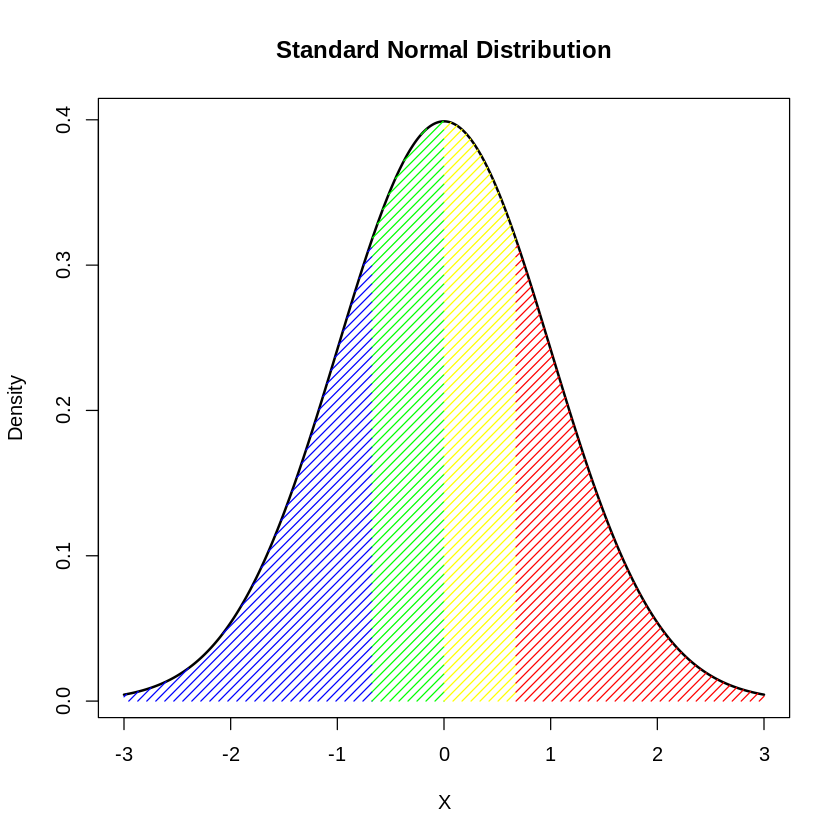

In [ ]:
# 必要なパッケージを読み込む
library(stats)

# xの範囲を定義
x <- seq(-3, 3, by=0.001)

# 四分位数の閾値を計算
q25 <- qnorm(0.25, mean = 0, sd = 1)
q50 <- qnorm(0.50, mean = 0, sd = 1)
q75 <- qnorm(0.75, mean = 0, sd = 1)

# xを四分位数に基づいて分割
a <- x[x <= q25]
b <- x[x > q25 & x <= q50]
c <- x[x > q50 & x <= q75]
d <- x[x > q75]

# PDFを計算
p <- dnorm(x, mean = 0, sd = 1)

# プロットの設定
plot(x, p, type="l", lwd=2, col="black", xlab="X", ylab="Density", main="Standard Normal Distribution")

# 四分位数に基づいて色分け
polygon(c(a, rev(a)), c(rep(0, length(a)), rev(dnorm(a, mean = 0, sd = 1))), col="blue", border=NA, density=20)
polygon(c(b, rev(b)), c(rep(0, length(b)), rev(dnorm(b, mean = 0, sd = 1))), col="green", border=NA, density=20)
polygon(c(c, rev(c)), c(rep(0, length(c)), rev(dnorm(c, mean = 0, sd = 1))), col="yellow", border=NA, density=20)
polygon(c(d, rev(d)), c(rep(0, length(d)), rev(dnorm(d, mean = 0, sd = 1))), col="red", border=NA, density=20)


### **5.4 共分散、相関係数**

#### **5.4.1 共分散と相関係数の説明**

相関係数(correlation coefficient)}は
$\begin{equation}
r = \frac{ S_{xy} }{ S_{x} S_{y} }
\end{equation}
$で定義されます。


ここで、$x$の分散(variance) $S_{x}^{2}$と$y$の分散$S_{y}^{2}$は
\begin{eqnarray}
S_{x}^{2} &=& \frac{1}{n} \sum_{i=1}^{n} \left( x_{i} - \bar{x} \right)^{2} = \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - \bar{x} ^{2} , \\
S_{y}^{2} &=& \frac{1}{n} \sum_{i=1}^{n} \left( y_{i} - \bar{y} \right)^{2} = \frac{1}{n} \sum_{i=1}^{n} y_{i}^{2} - \bar{y} ^{2}
\end{eqnarray}

と表され、$x$の平均(average) $\bar{x}$と$y$の平均 $\bar{y}$は
\begin{eqnarray}
\bar{x} &=& \frac{1}{n} \sum_{i=1}^{n} x_{i} \\
\bar{y} &=& \frac{1}{n} \sum_{i=1}^{n} y_{i}
\end{eqnarray}
です。

また、共分散(covariance) $S_{xy}$は
\begin{equation}
S_{xy} = \frac{1}{n} \sum_{i=1}^{n} \left( x_{i} - \bar{x} \right) \left( y_{i} - \bar{y} \right) = \frac{1}{n} \sum_{i=1}^{n} x_{i} y_{i} - \bar{x} \bar{y}
\end{equation}
です。


$\begin{equation}
r = \frac{ S_{xy} }{ S_{x} S_{y} }
\end{equation}
$の分母は$x$の$S_{x}^{2}$と$y$の分散$S_{y}^{2}$それぞれの平方根であることに注意してください。

#### **5.4.2 共分散と相関係数の計算**


共分散を計算するには、`cov()`関数を使用します。この関数は、二つのベクトルを引数として取り、それらの共分散を返します。

In [ ]:
# 二つのベクトル
x <- c(1, 2, 3, 4, 5)
y <- c(2, 3, 4, 5, 6)

# 共分散の計算
cov_xy <- cov(x, y)

# 結果の出力
print(paste("共分散:", cov_xy))

[1] "共分散: 2.5"


相関係数を計算するには、`cor()`関数を使用します。この関数は、二つのベクトルを引数として取り、それらの相関係数を返します。

In [ ]:
# 相関係数の計算
cor_xy <- cor(x, y)

# 結果の出力
print(paste("相関係数:", cor_xy))

[1] "相関係数: 1"


次に乱数同士の相関係数を求めてみます。

正規分布$\mathscr{N} (\mu,\sigma^2)$に従う正規乱数を生成する関数として`mvrnorm()`が用意されています。これを使って多変量正規分布に従う乱数を発生させます

平均が
$
\boldsymbol{\mu}  =
\begin{pmatrix}
0 \\
0\end{pmatrix}
$

分散共分散行列
$
\boldsymbol{\Sigma}  =
\begin{pmatrix}
1 & 0.8 \\
0.8 & 1
\end{pmatrix}
$

とした時の正規分布に従うとします
これは相関係数$r=0.8$の状態です

[1] 0.7869923

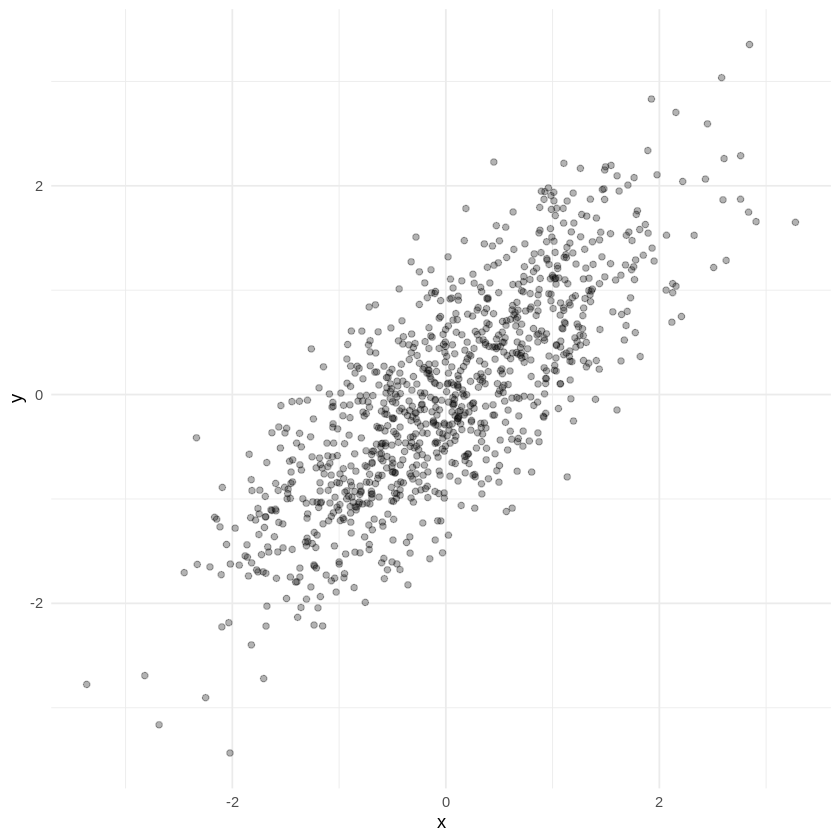

In [ ]:
# 必要なパッケージをロード
library(MASS)  # mvrnorm() 関数用
library(ggplot2)  # グラフ描画用

# 平均と共分散行列を設定
mu <- c(0, 0)
sigma <- matrix(c(1, .8, .8, 1), nrow=2)

# 乱数のシード値を設定
set.seed(0)

# 2次元正規乱数を1000点生成
values <- mvrnorm(n=1000, mu=mu, Sigma=sigma)

# 散布図の描画
ggplot(data.frame(x=values[,1], y=values[,2]), aes(x=x, y=y)) +
  geom_point(alpha=0.3) +
  theme_minimal()

# このデータの相関係数を計算
cor(values[,1],values[,2])

平均が
$
\boldsymbol{\mu}  =
\begin{pmatrix}
0 \\
0\end{pmatrix}
$

分散共分散行列
$
\boldsymbol{\Sigma}  =
\begin{pmatrix}
1 & -0.6 \\
-0.6 & 1
\end{pmatrix}
$

とした時の正規分布に従うとします
これは相関係数$r=-0.6$の状態です

[1] -0.5770299

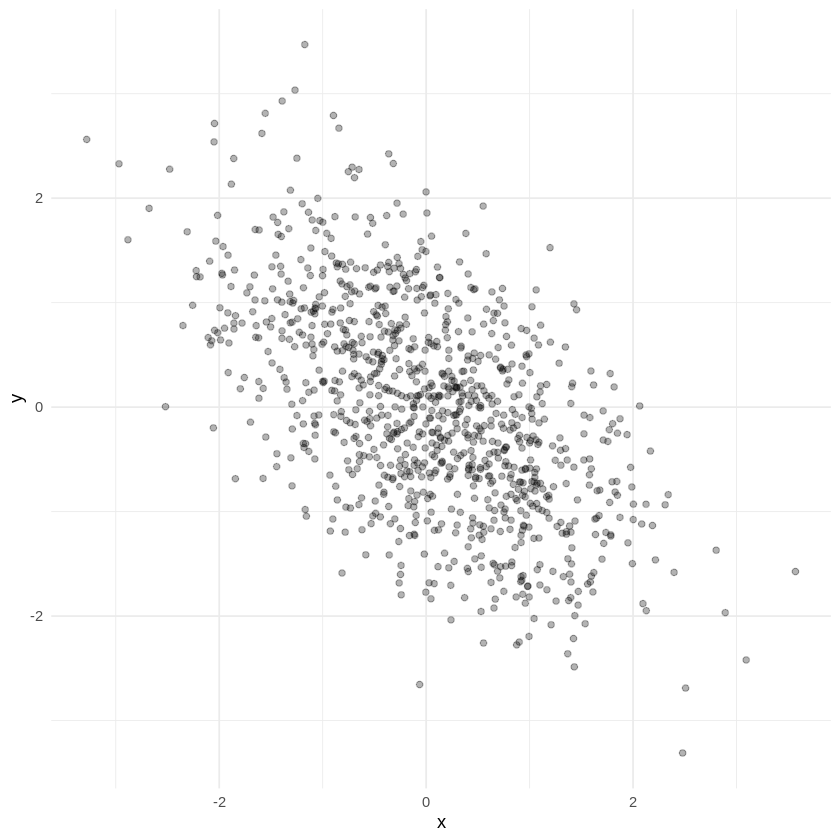

In [ ]:
# 必要なパッケージをロード
library(MASS)  # mvrnorm() 関数用
library(ggplot2)  # グラフ描画用

# 平均と共分散行列を設定
mu <- c(0, 0)
sigma <- matrix(c(1, -.6, -.6, 1), nrow=2)

# 乱数のシード値を設定
set.seed(0)

# 2次元正規乱数を1000点生成
values <- mvrnorm(n=1000, mu=mu, Sigma=sigma)

# 散布図の描画
ggplot(data.frame(x=values[,1], y=values[,2]), aes(x=x, y=y)) +
  geom_point(alpha=0.3) +
  theme_minimal()

# このデータの相関係数を計算
cor(values[,1],values[,2])

### **5.5 回帰分析**

#### **5.5.1 回帰分析の説明**

単回帰分析は、一つの独立変数と一つの従属変数との間の線形関係をモデル化する統計手法です。単回帰モデルは以下のように表されます：

$$ y_i = \beta_0 + \beta_1 x_i + \varepsilon_i $$

ここで、
- $ y_i $ は従属変数の $ i $ 番目の観測値です。
- $ x_i $ は独立変数の $ i $ 番目の観測値です。
- $ \beta_0 $ と $ \beta_1 $ はモデルのパラメータ（$ \beta_0 $ は切片、$ \beta_1 $ は傾き）です。
- $ \varepsilon_i $ は $ i $ 番目の観測値における誤差項です。


単回帰分析において、パラメータ $ \beta_0 $ と $ \beta_1 $ は最小二乗法によって推定されます。この方法は、すべての誤差項 $ \epsilon_i $ の二乗和が最小になるようにパラメータを求めます。計算式は以下の通りです：


$$ \beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{S_{xy}}{S_{x}^{2}}= r\frac{S_{y}}{S_{x}}$$


$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$

ここで、
- $ \bar{x} $ は $ x $ の平均値です。
- $ \bar{y} $ は $ y $ の平均値です。
- $r$は$x$と$y$の相関係数です。
- $S_{xy}$は共分散、$S_{x}$、$S_{y}$はそれぞれ標準偏差です。


単回帰モデルの適合度は $ R^2 $（決定係数）によって評価されることが一般的です。この値は、モデルによって説明される従属変数の変動の割合を示します。数式は以下の通りです：

$$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y_i})^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

ここで、
- $ \hat{y_i} $ は $ i $ 番目の $ x_i $ に対する予測値 $ \beta_0 + \beta_1 x_i $ です。


#### **5.5.2 `lm()`を使った回帰分析**

ではRの`lm()`（linear model）関数を使って回帰分析をしてみましょう。

2つの変数（ストレスレベルとパフォーマンススコア）の関係を回帰分析で検討します。ここで独立変数（説明変数）はストレスレベル、従属変数（目的変数）をパフォーマンスのスコアとします。



In [ ]:
# データフレーム
data <- data.frame(
stress_level = c(20, 25, 30, 35, 40, 45, 50, 55, 60, 65), # ストレスレベル
performance = c(88, 83, 82, 78, 74, 72, 70, 68, 65, 60) # パフォーマンススコア
)

回帰分析を行う前にデータの関係を視覚的に確認してみましょう。なにか関係がありそうです。

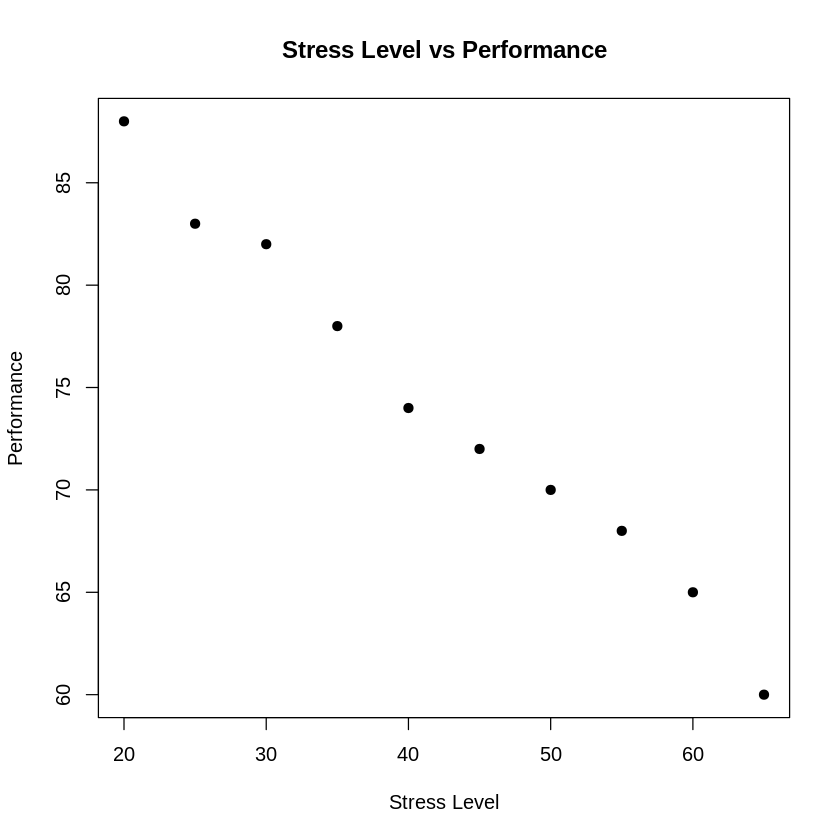

In [ ]:
# 散布図の作成
plot(data$stress_level, data$performance, main="Stress Level vs Performance",
   xlab="Stress Level", ylab="Performance", pch=19)

`lm()` 関数を使用してパフォーマンススコアをストレスレベルに回帰させる回帰分析を実行します。

この関数は下のように使います。

`lm(従属変数名 〜 独立変数名,  data = データフレーム名)`

チルダ記号（~）を挟んで変数間の関係を表す式は**モデル式**と呼ばれます。

In [ ]:
# 単回帰モデルのフィット
fit <- lm(performance ~ stress_level, data=data)
summary(fit)  # 結果の要約


Call:
lm(formula = performance ~ stress_level, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4364 -0.9318  0.0000  0.9954  1.1818 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  98.41818    1.05721   93.09 1.98e-13 ***
stress_level -0.57455    0.02357  -24.38 8.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.07 on 8 degrees of freedom
Multiple R-squared:  0.9867,	Adjusted R-squared:  0.9851 
F-statistic: 594.4 on 1 and 8 DF,  p-value: 8.552e-09


`summary()` はモデルの要約統計を提供します。ここでは、`summary()` 関数の出力に含まれる各部分の説明を行います。

1.   **Call**: モデルをフィットする際に使用した `lm()` 関数の呼び出し方法が表示されます。これには、使用された従属変数と独立変数が含まれます。

2.   **Residuals**: 残差の要約統計が表示されます。最小値、1四分位数、中央値（メディアン）、3四分位数、最大値が含まれます。残差は観測値とモデル予測値の差で、モデルのフィットの良さを評価するのに役立ちます。

3.   **Coefficients**: モデルの係数（切片と各説明変数の係数）が表示されます。各係数には以下が含まれます:
   -   **Estimate**: 係数の推定値。
   -   **Std. Error**: 推定値の標準誤差。
   -   **t value**: t統計量（推定値を標準誤差で割った値）。
   -   **Pr(>|t|)**: 係数が0であるという帰無仮説を棄却するp値。

4.   **Residual standard error**: 残差の標準誤差が表示されます。これは、モデルの予測値と実際の観測値との間の平均二乗誤差の平方根です。

5.   **Multiple R-squared, Adjusted R-squared**: 決定係数（$R^2$）および調整済み決定係数が表示されます。モデルがデータの変動をどれだけ説明できるかを示します。値が1に近いほど、モデルによる説明が適切であると評価されます。

6.   **$F$-statistic, $p$-value**: モデル全体の適合度を評価するためのF統計量およびソレに基づく$p$値が示されます。


最後に、回帰直線を散布図に追加してみましょう。

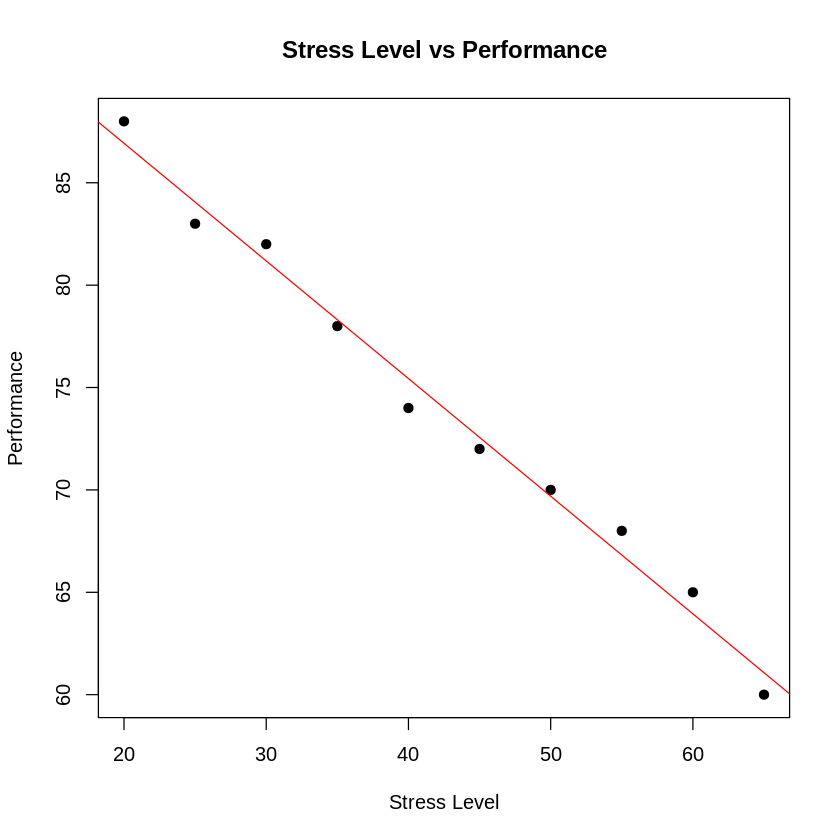

In [ ]:
# 散布図の作成
plot(data$stress_level, data$performance, main="Stress Level vs Performance",
   xlab="Stress Level", ylab="Performance", pch=19)
# 散布図に回帰直線を追加
abline(fit, col="red") # 回帰直線の追加

### **5.6 まとめ**

In [ ]:
# 記述統計量（1変量）
# 1,3,2,4,5を要素とするベクトルx
x <- c(1,3,2,4,5)

# サンプルサイズ
length(x)

# 合計
sum(x)

# 平均
mean(x)

# 中央値
median(x)

# 最頻値
# このデータではうまくもとめられません
which.max(table(x))

# 最大値
max(x)

#最小値
min(x)

# 範囲
max(x)-min(x)

# 四分位点
quantile(x)

# 不偏分散
var(x)

# 標本分散（公式通りに書くと）
sv <- sum((x-mean(x))^2)/length(x)
print(sv)

# 標本分散（このようにも求められる。不偏分散× (N-1)/Nなので）
sv <- var(x)*(length(x)-1)/length(x)
print(sv)

# 標準偏差
# 上で求めた分散を用いて計算する
sqrt(sv)

# 標準得点
z <- (x - mean(x))/sqrt(sv)
print(z)

# 標準正規分布の確率分布関数（pnorm）
p <- pnorm(z)
print(p)

# 標準正規分布の確率分布関数の逆関数（qnorm）
q <- qnorm(p)
print(q) #zと同じ値になる

[1] 5

[1] 15

[1] 3

[1] 3

1 
1

[1] 5

[1] 1

[1] 4

0%  25%  50%  75% 100% 
   1    2    3    4    5

[1] 2.5

[1] 2
[1] 2


[1] 1.414214

[1] -1.4142136  0.0000000 -0.7071068  0.7071068  1.4142136
[1] 0.0786496 0.5000000 0.2397501 0.7602499 0.9213504
[1] -1.4142136  0.0000000 -0.7071068  0.7071068  1.4142136


In [ ]:
# 記述統計（2変量）

# 二つのベクトル
x <- c(1, 2, 3, 4, 5)
y <- c(6, 5, 4, 3, 2)

# 共分散
cov(x, y)

# 相関係数の計算
cor(x, y)

[1] -2.5

[1] -1

In [ ]:
#  回帰分析
summary(lm(y ~ x))

Warning message in summary.lm(lm(y ~ x)):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = y ~ x)

Residuals:
         1          2          3          4          5 
-7.015e-16  9.462e-16  2.452e-17 -8.156e-17 -1.876e-16 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  7.000e+00  7.241e-16  9.668e+15   <2e-16 ***
x           -1.000e+00  2.183e-16 -4.581e+15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.904e-16 on 3 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.098e+31 on 1 and 3 DF,  p-value: < 2.2e-16
